<a href="https://colab.research.google.com/github/LabuBu-Toy/Machine-Learning-68/blob/main/ML_Assignment__standard_team.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fetal-health-classification 👶🏻🐣🍼

Dataset Link: https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification


# Project overview

This notebook trains and evaluates multiclass classifiers on the CTG (fetal health) dataset. The workflow follows modern best practices: stratified splits/CV, leakage‑safe Pipelines, inside‑CV resampling for imbalance, metric‑aligned tuning, and clear, reproducible reporting.

## Objectives

- Build leakage‑safe Pipelines for cost‑sensitive and resampled variants.

- Use stratified train/test and RepeatedStratifiedKFold for robust model selection.

- Tune with HalvingRandomSearchCV and refit on the primary metric (e.g., f1_macro).

- Report per‑class metrics, balanced accuracy, confusion matrices, and Precision–Recall summaries.

## Data loading & schema

Confirm feature types. If you mix numeric and categorical features, move preprocessing to a ColumnTransformer inside the Pipeline so numeric scaling and categorical encoding are handled correctly and jointly tuned.

Keep a short raw → cleaned feature lineage (bullets are fine) to document transformations.



### **Abstract** บทคัดย่อ

Classify fetal health in order to **prevent child and maternal mortality**.

จัดประเภทสุขภาพของทารกในครรภ์เพื่อป้องกันการตายของเด็กและมารดา

### **Context** รายละเอียดและบริบท

Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress.
The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

In light of what was mentioned above, [Cardiotocograms](https://thekingsleyclinic.com/resources/understanding-cardiotocography-key-to-fetal-heart-monitoring/) (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

การลดอัตราการตายของเด็ก สะท้อนให้เห็นในเป้าหมายการพัฒนาที่ยั่งยืนหลายประการของสหประชาชาติ และเป็นตัวบ่งชี้สำคัญของความก้าวหน้าของมนุษย์
สหประชาชาติคาดหวังว่าภายในปี 2573 ประเทศต่างๆ จะยุติการเสียชีวิตที่ป้องกันได้ของทารกแรกเกิดและเด็กอายุต่ำกว่า 5 ปี โดยทุกประเทศมีเป้าหมายที่จะลดอัตราการตายของเด็กอายุต่ำกว่า 5 ปีให้เหลืออย่างน้อยที่สุด 25 คนต่อการเกิดมีชีพ 1,000 คน

ควบคู่ไปกับแนวคิดเรื่องการตายของเด็ก แน่นอนว่ามีการตายของมารดา ซึ่งคิดเป็น 295,000 รายที่เสียชีวิตระหว่างและหลังการตั้งครรภ์และการคลอดบุตร (ข้อมูล ณ ปี 2560) การเสียชีวิตส่วนใหญ่เหล่านี้ (94%) เกิดขึ้นในสภาพแวดล้อมที่มีทรัพยากรน้อย และส่วนใหญ่สามารถป้องกันได้

จากที่กล่าวมาข้างต้น [Cardiotocograms](https://thekingsleyclinic.com/resources/understanding-cardiotocography-key-to-fetal-heart-monitoring/) (CTGs) เป็นทางเลือกที่ง่ายและเข้าถึงได้ในราคาไม่แพงสำหรับการประเมินสุขภาพของทารกในครรภ์ ทำให้ผู้เชี่ยวชาญด้านสุขภาพสามารถดำเนินการเพื่อป้องกันการตายของเด็กและมารดาได้ อุปกรณ์ทำงานโดยการส่งคลื่นอัลตราซาวนด์และอ่านการตอบสนอง ซึ่งจะให้ข้อมูลเกี่ยวกับอัตราการเต้นของหัวใจทารกในครรภ์ (FHR) การเคลื่อนไหวของทารกในครรภ์ การหดตัวของมดลูก และอื่นๆ

### **Data** ข้อมูล

This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes:

- Normal
- Suspect
- Pathological

# ตารางคำอธิบายคอลัมน์ — Fetal Health Classification

> ชุดข้อมูลจาก Kaggle: 2,126 แถว, 22 คอลัมน์ (21 ฟีเจอร์ + 1 เป้าหมาย `fetal_health`)

## ตารางฟีเจอร์ (ตัวแปรอิสระ 21 ช่อง)

| ชื่อคอลัมน์ (อังกฤษ)                                          | คำแปลไทย                        | ความหมาย                                                              | หน่วย/สเกล      | dtype   |
| ------------------------------------------------------------- | ------------------------------- | --------------------------------------------------------------------- | --------------- | ------- |
| baseline value                                                | อัตราการเต้นหัวใจพื้นฐานของทารก | ค่า FHR baseline ระหว่างตรวจ                                          | bpm             | float64 |
| accelerations                                                 | การเร่งของ FHR                  | จำนวนครั้งที่ FHR เร่งขึ้นชั่วคราวต่อวินาที                           | ต่อวินาที       | float64 |
| fetal\_movement                                               | การเคลื่อนไหวทารก               | จำนวนเหตุการณ์การเคลื่อนไหวต่อวินาที                                  | ต่อวินาที       | float64 |
| uterine\_contractions                                         | การหดรัดตัวของมดลูก             | จำนวนเหตุการณ์การหดรัดตัวต่อวินาที                                    | ต่อวินาที       | float64 |
| light\_decelerations                                          | การชะลอตัวแบบเบา                | จำนวนครั้งที่ FHR ลดลงเล็กน้อยต่อวินาที                               | ต่อวินาที       | float64 |
| severe\_decelerations                                         | การชะลอตัวแบบรุนแรง             | จำนวนครั้งที่ FHR ลดลงรุนแรงต่อวินาที                                 | ต่อวินาที       | float64 |
| prolongued\_decelerations                                     | การชะลอตัวยาวนาน                | จำนวนครั้งที่ FHR ลดลงแบบยืดเยื้อต่อวินาที *(สะกดตามชื่อคอลัมน์จริง)* | ต่อวินาที       | float64 |
| abnormal\_short\_term\_variability                            | % เวลา STV ผิดปกติ              | ร้อยละของเวลา “ความแปรปรวนระยะสั้น (STV)” ที่ผิดปกติ                  | %               | float64 |
| mean\_value\_of\_short\_term\_variability                     | ค่าเฉลี่ย STV                   | ค่าดัชนีเฉลี่ยของความแปรปรวนระยะสั้นของ FHR                           | ดัชนีเชิงตัวเลข | float64 |
| percentage\_of\_time\_with\_abnormal\_long\_term\_variability | % เวลา LTV ผิดปกติ              | ร้อยละของเวลา “ความแปรปรวนระยะยาว (LTV)” ที่ผิดปกติ                   | %               | float64 |
| mean\_value\_of\_long\_term\_variability                      | ค่าเฉลี่ย LTV                   | ค่าดัชนีเฉลี่ยของความแปรปรวนระยะยาวของ FHR                            | ดัชนีเชิงตัวเลข | float64 |
| histogram\_width                                              | ความกว้างฮิสโตแกรม FHR          | ช่วงกว้างของค่าฮิสโตแกรม FHR                                          | bpm             | float64 |
| histogram\_min                                                | ค่าต่ำสุดฮิสโตแกรม              | ค่าต่ำสุดของการกระจาย FHR                                             | bpm             | float64 |
| histogram\_max                                                | ค่าสูงสุดฮิสโตแกรม              | ค่าสูงสุดของการกระจาย FHR                                             | bpm             | float64 |
| histogram\_number\_of\_peaks                                  | จำนวนยอดในฮิสโตแกรม             | จำนวน peaks ในฮิสโตแกรม                                               | จำนวน (นับได้)  | float64 |
| histogram\_number\_of\_zeroes                                 | จำนวนช่องที่เป็นศูนย์           | จำนวน bins ที่ความถี่เป็นศูนย์                                        | จำนวน (นับได้)  | float64 |
| histogram\_mode                                               | ฐานนิยมฮิสโตแกรม                | ค่า FHR ที่พบบ่อยที่สุด                                               | bpm             | float64 |
| histogram\_mean                                               | ค่าเฉลี่ยฮิสโตแกรม              | ค่าเฉลี่ยของการกระจาย FHR                                             | bpm             | float64 |
| histogram\_median                                             | มัธยฐานฮิสโตแกรม                | ค่ากึ่งกลางของการกระจาย FHR                                           | bpm             | float64 |
| histogram\_variance                                           | ความแปรปรวนฮิสโตแกรม            | การกระจายตัวของ FHR รอบค่าเฉลี่ย                                      | bpm²            | float64 |
| histogram\_tendency                                           | แนวโน้มฮิสโตแกรม                | ดัชนีบอกแนวโน้มโดยรวมของฮิสโตแกรม                                     | ดัชนีเชิงตัวเลข | float64 |

## ตัวแปรเป้าหมาย (Target)

| คอลัมน์       | คำแปลไทย       | การเข้ารหัสผลลัพธ์                            | dtype   |
| ------------- | -------------- | --------------------------------------------- | ------- |
| fetal\_health | ชั้นสุขภาพทารก | **1 = Normal, 2 = Suspect, 3 = Pathological** | float64 |


# Step 1: Import Libraries and Load Dataset

We begin by importing the necessary libraries and loading the dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from pprint import pprint
from fnmatch import fnmatchcase

In [ ]:
import warnings
warnings.filterwarnings('ignore') # Ignore any warning

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, classification_report,  log_loss,
    confusion_matrix, ConfusionMatrixDisplay, recall_score,
    balanced_accuracy_score, make_scorer, precision_score,
    f1_score, roc_auc_score, average_precision_score)

from imblearn.metrics import classification_report_imbalanced
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, SVMSMOTE, RandomOverSampler, SMOTEN, SMOTENC, KMeansSMOTE
from imblearn.combine import SMOTEENN

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

In [ ]:
from sklearn.base import clone
from fnmatch import fnmatchcase
from collections import Counter, defaultdict
from math import ceil

In [ ]:
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.decomposition import PCA

In [ ]:
sns.set(style='darkgrid')

In [ ]:
import kagglehub
from pathlib import Path

# Download Dataset from Kaggle
dataset_path = kagglehub.dataset_download("andrewmvd/fetal-health-classification")

file_path = Path(dataset_path)
file_path = file_path / 'fetal_health.csv'

In [ ]:
# Set Random SEED
SEED = 42

In [ ]:
data = pd.read_csv(file_path)
display(data)
data.info()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

## Handling Missing Values

In [ ]:
pprint(f"Data Shape: {data.shape}")
pprint(f"Missing values: {data.isnull().sum().sum()}")

'Data Shape: (2126, 22)'
'Missing values: 0'


> Data in this dataset is Good to go

# Step 2: Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is an approach to analyzing and summarizing a dataset's main characteristics, often with visual methods. It's a crucial first step in the data science process.

Here's why it's important and what it typically involves:

Why EDA?

- **Understand the data**: Get a feel for the data's structure, content, and potential issues.
- **Identify patterns and relationships**: Discover trends, correlations, and anomalies.
- **Detect errors and outliers**: Find inconsistencies, missing values, or unusual data points.
- **Inform feature engineering**: Gain insights that help create new, more informative features.
- **Guide model selection**: Understand the data's characteristics to choose appropriate modeling techniques.
- **Validate assumptions**: Check if the data meets the assumptions of potential models.

What does EDA involve?

- **Summary Statistics**: Calculating basic statistics like mean, median, mode, standard deviation, etc., for numerical features.
- **Data Visualization**: Creating plots and charts to visualize data distributions, relationships between variables, and patterns. Common visualizations include:
  - **Histograms and Density Plots**: To see the distribution of a single numerical variable.
  - **Box Plots**: To visualize the distribution and potential outliers of numerical data across different categories.
  - **Scatter Plots**: To explore the relationship between two numerical variables.
  - **Bar Charts**: To show the frequency or proportion of categorical variables.
  - **Heatmaps**: To visualize the correlation between variables (as shown in the last code cell).
- **Handling Missing Values**: Identifying and deciding how to deal with missing data points (e.g., imputation, removal).
- **Identifying Outliers**: Detecting extreme values that may skew results or indicate errors.
- **Exploring Relationships**: Analyzing how different variables relate to each other and the target variable.



## **Class Distribution**?

It’s the **counts or proportions of samples in each label (class)** in your dataset’s target column. For the fetal‐health dataset, it tells you how many records are labeled **1 = Normal, 2 = Suspect, 3 = Pathological**, and what share each class represents of the total.

---

## Why it matters

* **Detect imbalance.** If one class dominates (e.g., 90% Normal, 5% Suspect, 5% Pathological), a model can appear accurate while ignoring minority classes.
* **Choose the right metrics.** When classes are imbalanced, prefer **precision/recall, F1 (macro/weighted), PR‑AUC** over raw accuracy.
* **Guide modeling choices.** You might use **class weights**, **resampling** (SMOTE/undersampling), or **threshold tuning**.
* **Stratified splits.** Keep class ratios similar in train/test to avoid evaluation drift.

---

## Quick ways to compute it


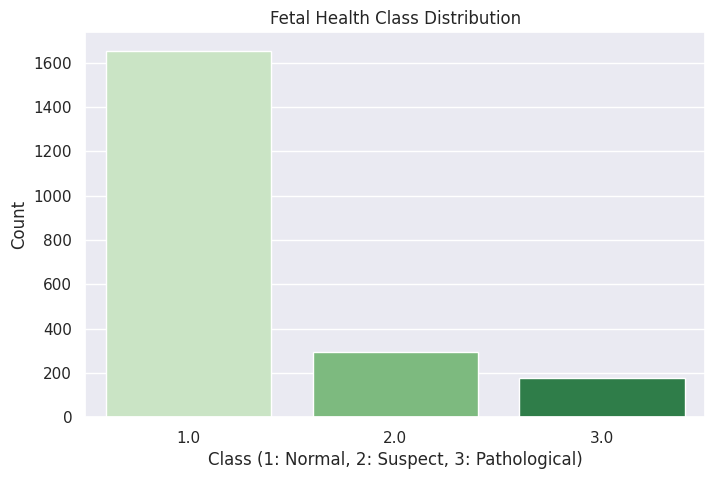

In [ ]:
# Class distribution
plt.figure(figsize=(8,5))
sns.countplot(x='fetal_health', data=data, palette='Greens')
plt.title('Fetal Health Class Distribution')
plt.xlabel('Class (1: Normal, 2: Suspect, 3: Pathological)')
plt.ylabel('Count')
plt.show()

In [ ]:
# Counts per class (sorted by feature label)
pprint(data['fetal_health'].value_counts(sort=True))

fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64


In [ ]:
# Percentage per class
pprint(data['fetal_health'].value_counts(normalize=True, sort=True)
     .mul(100).round(4))

fetal_health
1.0    77.8457
2.0    13.8758
3.0     8.2785
Name: proportion, dtype: float64



> **Baseline accuracy:** the share of the majority class. If class 1 is 70%, a naive "always‑1" model gets 70% accuracy —why accuracy alone can mislead.

---

### What to do if it’s class imbalanced

* **Metrics:** use **F1 (macro/weighted)**, **recall** for critical classes (e.g., Pathological), **PR‑AUC**.
* **Class weights:**  Pass Class weights to models that support `class_weight`.





* **Resampling:** oversample minority (e.g., **SMOTE**) or undersample majority (use carefully to avoid losing signal).
* **Stratify splits:** Strategic
* **Threshold tuning:** Adjust decision thresholds to trade precision vs recall per class.

### Common pitfalls

* **Accuracy paradox:** High accuracy from predicting only the majority class.
* **Data leakage:** Balancing after splitting can leak information—apply resampling **within** cross‑validation folds.
* **Over‑synthetic patterns:** Aggressive SMOTE settings can overfit; monitor with validation curves.

---

> TL-DR: Class distribution = "**How many (or what percent) of each label do we have?**"
Check it early. If it’s skewed, choose proper metrics, stratify, consider class weights/resampling, and tune thresholds.

## Data Correlation Heatmap

A correlation heatmap is a color-coded grid that shows the pairwise correlation coefficients between variables in a dataset. Each row/column is a variable; each cell’s color and number indicate how strongly two variables move together:

Value range: from –1 to +1

- +1: perfect positive linear relationship (as one increases, the other increases)

- 0: no linear relationship

- –1: perfect negative linear relationship (as one increases, the other decreases)

> Symmetry: the matrix is symmetric; the diagonal is always 1.

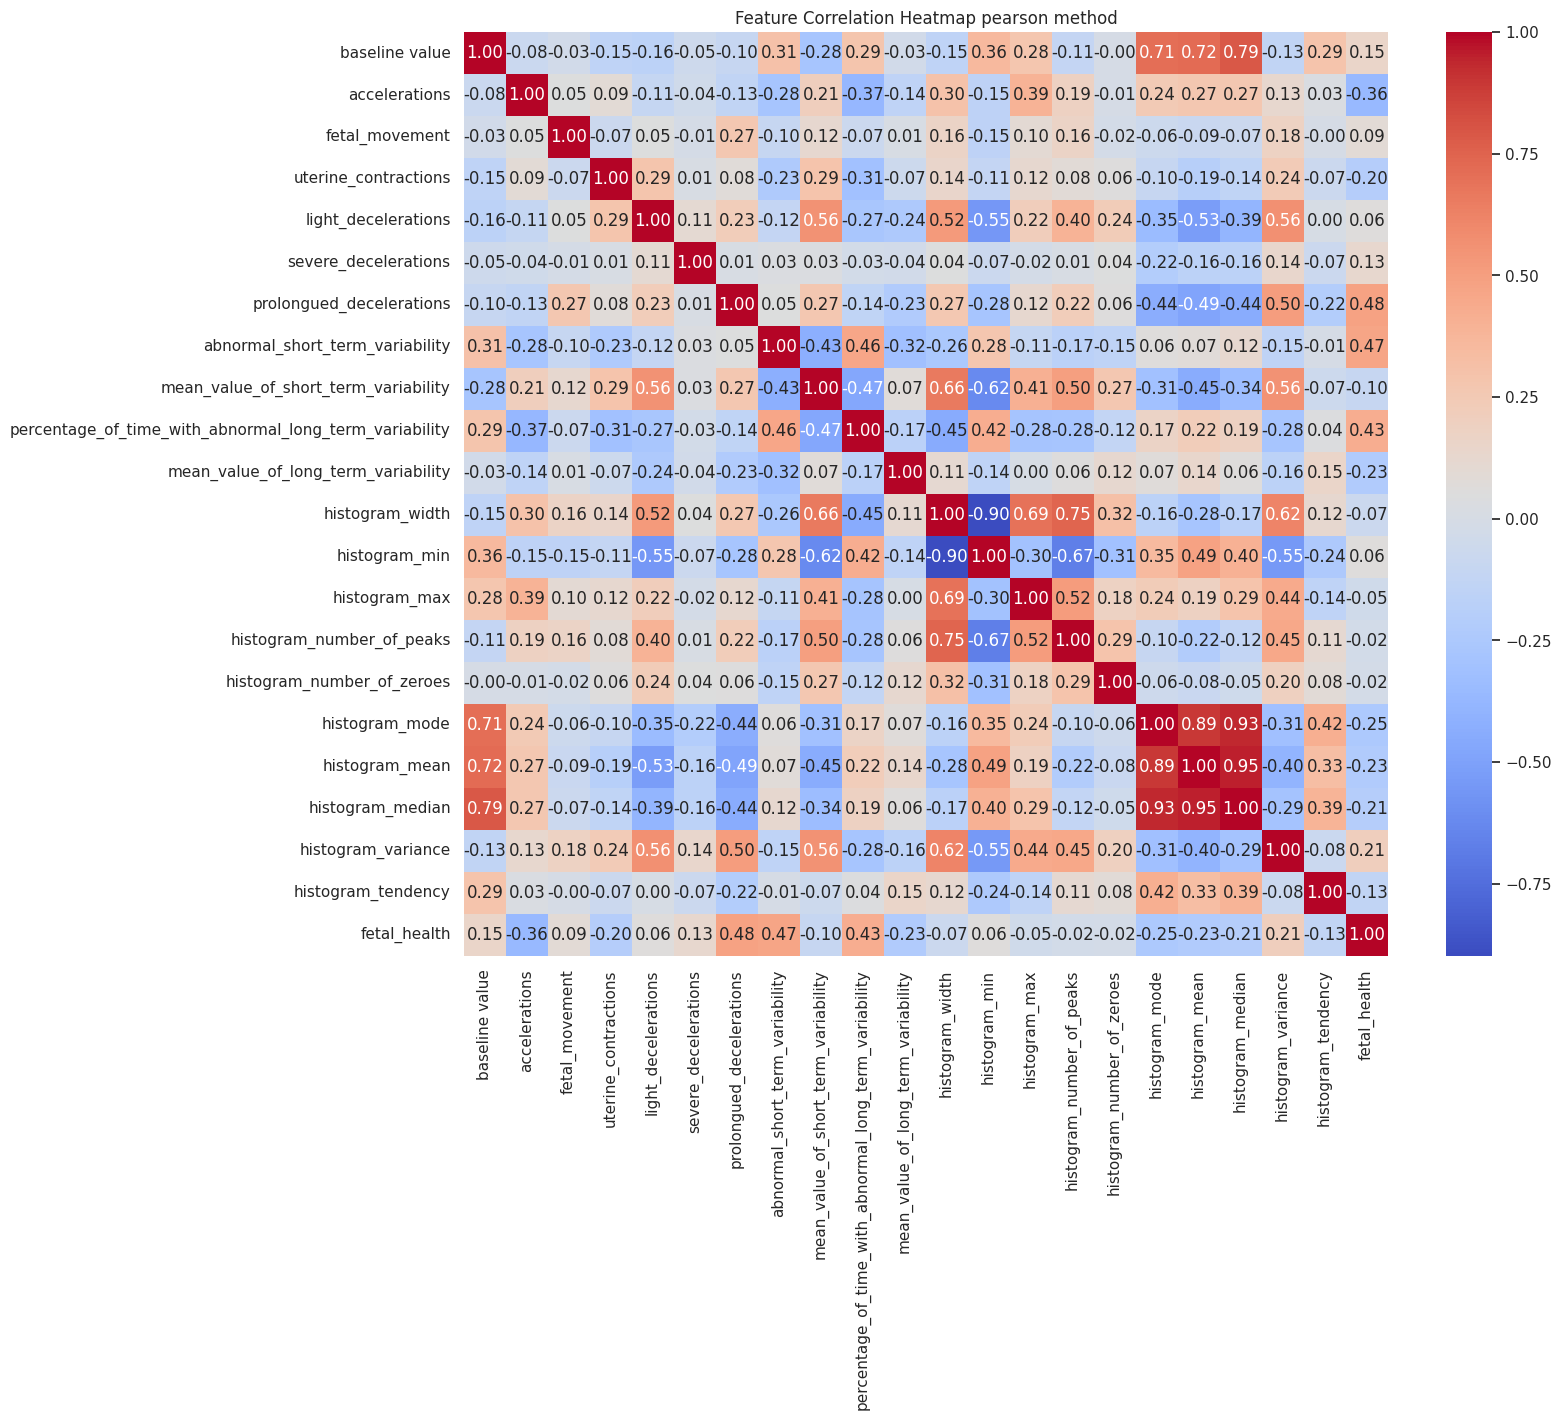

In [ ]:
# Correlation heatmap pearson method
plt.figure(figsize=(15, 12))
sns.heatmap(data.corr(method="pearson"), annot=True, fmt='.2f', cmap="coolwarm", square=True) #use
plt.title('Feature Correlation Heatmap pearson method')
plt.show()

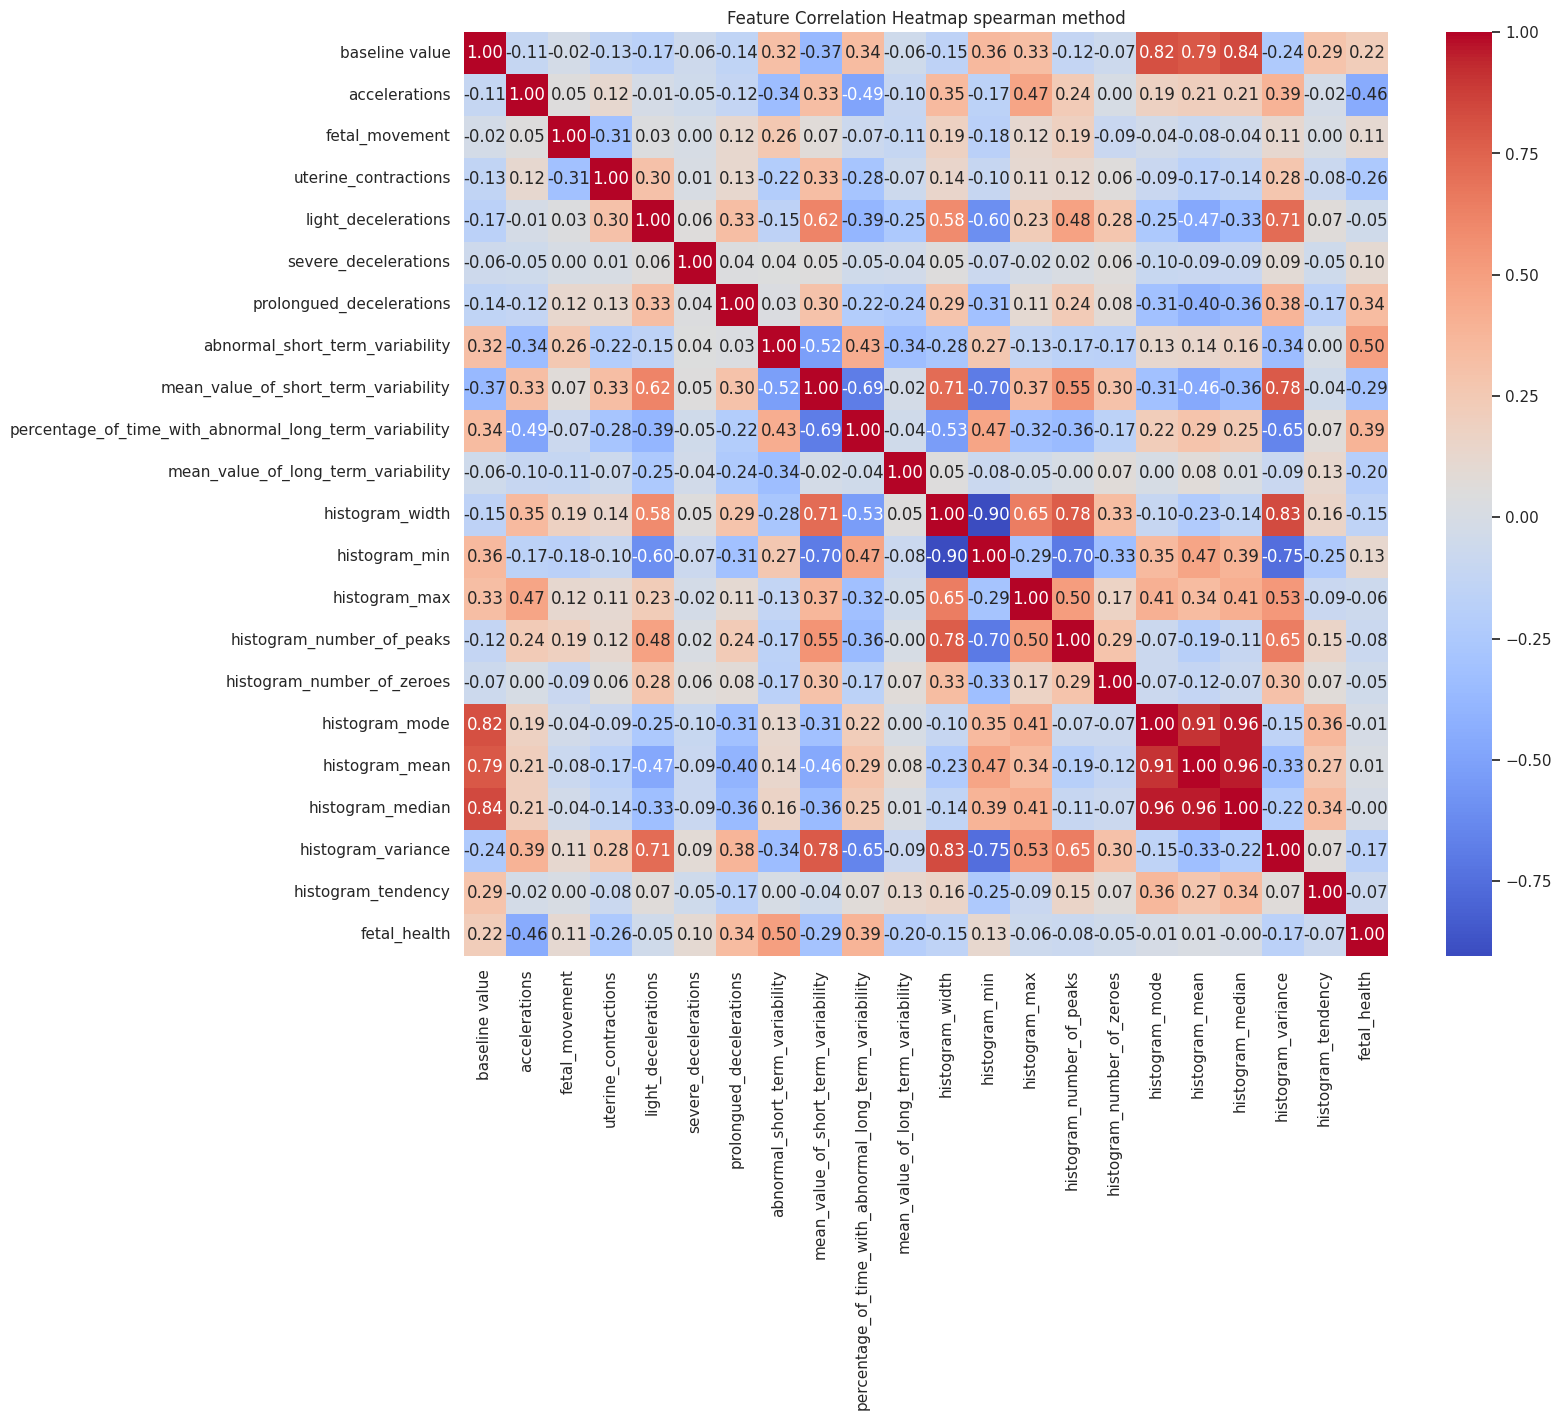

In [ ]:
# Correlation heatmap Spearman
plt.figure(figsize=(15, 12))
sns.heatmap(data.corr(method="spearman"), annot=True, fmt='.2f', cmap="coolwarm", square=True) #use
plt.title('Feature Correlation Heatmap spearman method')
plt.show()

Between features (feature ↔ feature)
- Pearson (default) — to spot linear redundancy/multicollinearity (e.g., histogram mean/median/mode often correlate).

> Why: fast, standard for pruning highly collinear inputs before linear models, logistic regression, or to simplify trees.

- Spearman (ρ) — rank-based, more robust to skew/outliers and captures monotonic but non-linear relations common in this dataset (lots of zeros, heavy tails).

>Tip: If Pearson is low but Spearman is high, you likely have a monotonic nonlinearity or outliers.

Practice: Make two heatmaps (Pearson & Spearman). Use Pearson to flag drops (e.g., |r| > 0.9), and Spearman to avoid being fooled by non-normality.

# Step 3: Data Prepareation

Separate features and target variable.**bold text**

In [ ]:
# Features / Target
X = data.drop(columns=['fetal_health']).copy()   # explicit list + copy for safety

# Optional: drop all columns starting with "histogram" (case-insensitive)
X = X.loc[:, ~X.columns.str.lower().str.startswith('histogram')]

# Kaggle labels are floats (1.0/2.0/3.0); casting to int is often nicer
y = data['fetal_health'].astype('int64')

# 2) Check Data Shape
print(X.shape, y.shape)

assert 'fetal_health' not in X.columns
# assert not any(X.columns.str.lower().str.startswith('histogram'))  # if you dropped them

(2126, 11) (2126,)




We address class imbalance by oversampling minority classes. Features are scaled for consistent ranges and PCA is applied to reduce dimensionality while retaining 95% variance.

> When your classes are imbalanced (e.g., many “Normal”, few “Pathological”), most learners focus on the majority class and under-learn the minority. That creates great-looking accuracy but bad real-world performance on the rare, important cases


# Step 4: Data Train-Test-Split and k-Fold Cross Validation





## Train/Test split

- Use train_test_split(..., stratify=y) to maintain class proportions in the test set.



In [ ]:
from dataclasses import dataclass, field
from typing import Any

@dataclass
class DataSplit:
    x: Any
    y: Any
    test_size: float
    random_state: int = 0

    __x: dict = field(init=False, default_factory=dict, repr=False)
    __y: dict = field(init=False, default_factory=dict, repr=False)

    def __post_init__(self):

        X_tr, X_te, y_tr, y_te = train_test_split(
                self.x, self.y,
                test_size=self.test_size,
                stratify=self.y,
                random_state=self.random_state,
        )

        # X
        self.__x['train'], self.__x['test'] = X_tr, X_te
        # Y
        self.__y['train'], self.__y['test'] = y_tr, y_te

    @property
    def X_train(self): return self.__x['train']
    @property
    def X_test(self):  return self.__x['test']
    @property
    def y_train(self): return self.__y['train']
    @property
    def y_test(self):  return self.__y['test']

### Setup StratifiedKFold

- Use StratifiedKFold / RepeatedStratifiedKFold for model selection to preserve class balance across folds and stabilize estimates via repeats.

> Why this mattersStratification guards against optimistic/unstable estimates when classes are imbalanced. Repeats reduce variance of CV metrics.

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

Split the processed data into training and testing sets, maintaining stratification to preserve class balance.



In [ ]:
data_train_test = DataSplit(
                          x = X,
                          y = y,
                          test_size = 0.2,
                          random_state = 42
                       )


### (Option) When if data imbalance What will goes wrong

- Skewed decision boundary: Model predicts the majority most of the time → low recall for minority.

- Misleading metrics: Overall accuracy/micro-F1 look high even if minority recall ≈ 0. ROC-AUC can look okay; PR (precision–recall) is more honest.

- Unstable training: Few minority examples → high variance, overfitting (especially if you duplicate them).

- Poor calibration: Probabilities get biased toward the majority prior.

> Tiny example (990 zeros, 10 ones): always predicting “0” gives 99% accuracy, but minority recall = 0%.

In [ ]:
classes = np.sort(np.unique(data_train_test.y_train))
weights = compute_class_weight(class_weight="balanced", classes=classes, y=data_train_test.y_train)
data_class_weight = dict(zip(classes, weights))
pprint(data_class_weight)

{np.int64(1): np.float64(0.42831947593852354),
 np.int64(2): np.float64(2.401129943502825),
 np.int64(3): np.float64(4.0189125295508275)}


## Pipeline design & leakage avoidance

Keep all preprocessing, dimensionality reduction, and resampling inside a single ImbPipeline. This ensures samplers (e.g., SMOTE) run only on the training fold during fit, never on validation/test, preventing information leakage.

Because SMOTE is distance‑based, scale features before the sampler so neighborhoods are meaningful.

### Cost‑sensitive vs. resampling

- Start with a cost‑sensitive baseline (class_weight='balanced').

- Compare with resampled variants (e.g., SMOTE, RandomOverSampler) via CV.

- Let the metric‑aligned refit pick the winner.

# Step 5: Models Training, Tuning and Evaluation


Define a helper function for training and evaluating models.

Models list:  
- Logistic Regression
- SVM
- KNN
- Decision Tree
- Random Forest.

> For each model, report accuracy, classification report, and plot confusion matrix.

## Configuration

In [ ]:
# ======== CONFIG ========
smote_like = (SMOTE, BorderlineSMOTE, SVMSMOTE, SMOTEN, SMOTENC, KMeansSMOTE, SMOTEENN)

PRIMARY_SCORER = "f1_macro"  # refit target

In [ ]:
# Metrics: Loss (log-loss), Accuracy, Precision, Recall, plus your F1s
# NOTE: log-loss scorer in sklearn is named "neg_log_loss" (maximized),
# so we expose it as "log_loss" and flip the sign when reporting.
scoring = {
    "log_loss": "neg_log_loss",          # will flip sign in summary
    "accuracy": "accuracy",
    "balanced_acc": "balanced_accuracy",
    "precision_macro": "precision_macro",
    "precision_weighted": "precision_weighted",
    "recall_macro": "recall_macro",
    "recall_weighted": "recall_weighted",
    "f1_macro": "f1_macro",
    "f1_weighted": "f1_weighted",
}


## Function Helper

In [ ]:
def grid_for(model_name: str, grid_map: dict) -> dict | None:
    # allow both exact and wildcard matches; also fix "LogReg_*" -> "LogReg*"
    grid_map = {k.replace("_*", "*"): v for k, v in grid_map.items()}
    if model_name in grid_map:
        return grid_map[model_name]
    for pattern, grid in grid_map.items():
        if fnmatchcase(model_name, pattern):
            return grid
    return None

def find_smote_param_prefixes(estimator):
    """Return param prefixes pointing to SMOTE-like instances (supports nesting, e.g. 'sampler__smote')."""
    prefixes = []
    for k, v in estimator.get_params(deep=True).items():
        if isinstance(v, smote_like):
            prefixes.append(k)
    return prefixes

def safe_k_neighbors(y, n_splits, default_k=5):
    """Safe SMOTE k per worst-case train fold."""
    counts = Counter(y)
    min_train = min(c - ceil(c / n_splits) for c in counts.values())
    if min_train < 2:
        return None
    return max(1, min(default_k, min_train - 1))

def pipeline_has_smote_or_smoteenn(estimator) -> bool:
    """Return True if any parameter in the estimator tree is an instance of a SMOTE-family sampler or SMOTEENN."""
    for _, v in estimator.get_params(deep=True).items():
        if isinstance(v, smote_like):
            return True
    return False

def evaluate_on_test(est, X_test = data_train_test.X_test, y_test = data_train_test.y_test):
    """Return dict of test metrics and show confusion matrices."""

    y_pred = est.predict(X_test)
    metrics = {
        "accuracy": accuracy_score(y_test, y_pred),
        "balanced_acc": balanced_accuracy_score(y_test, y_pred),
        "precision_macro": precision_score(y_test, y_pred, average="macro", zero_division=0),
        "precision_weighted": precision_score(y_test, y_pred, average="weighted", zero_division=0),
        "recall_macro": recall_score(y_test, y_pred, average="macro", zero_division=0),
        "recall_weighted": recall_score(y_test, y_pred, average="weighted", zero_division=0),
        "f1_macro": f1_score(y_test, y_pred, average="macro"),
        "f1_weighted": f1_score(y_test, y_pred, average="weighted"),
    }
    # log loss & ROC-AUC if proba/decision available
    if hasattr(est, "predict_proba"):
        y_prob = est.predict_proba(X_test)
        try:
            metrics["log_loss"] = log_loss(y_test, y_prob, labels=np.unique(y_test))
        except Exception:
            pass
        try:
            metrics["roc_auc_ovr"] = roc_auc_score(y_test, y_prob, multi_class="ovr")
        except Exception:
            pass
    print("-" * 20)
    print("\n- Classification report (test):")
    print(classification_report(y_test, y_pred, digits=4, zero_division=0))

    print("\n- Imbalance Classification report (test):")
    print(classification_report_imbalanced(y_test, y_pred, digits=4, zero_division=0))

    # Confusion matrices
    try:
        ConfusionMatrixDisplay.from_estimator(est, X_test, y_test)
        plt.title("Confusion Matrix (counts)")
        plt.show()
        ConfusionMatrixDisplay.from_estimator(est, X_test, y_test, normalize="true")
        plt.title("Confusion Matrix (normalized)")
        plt.show()
    except Exception:
        pass

    print("-" * 20)
    return metrics

## Model Comparison & Selection

Among the traditional machine learning models tested, **Random Forest** achieved the highest accuracy and strong classification metrics across all classes.

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

pipelines = {
    # 1) Logistic Regression
    # A. Cost-sensitive baseline (often very strong)
    "LogReg_weighted": ImbPipeline([
        ("scale", StandardScaler()),
        ("pca", PCA(n_components=0.95)),   # make this a param to tune: [None, 0.95, 0.9, 0.8]
        ("clf", LogisticRegression(max_iter=2000, class_weight="balanced", random_state=SEED))
    ]),
    # B. SMOTE variant (try when classes are highly skewed)
    "LogReg_SMOTE": ImbPipeline([
        ("scale", StandardScaler()),
        ("pca", PCA(n_components=0.95)),
        ("smote", SMOTE(sampling_strategy="not majority", random_state=SEED)),
        ("clf", LogisticRegression(max_iter=2000, random_state=SEED))
    ]),
    # C. Super-simple baseline
    "LogReg_ROS": ImbPipeline([
        ("scale", StandardScaler()),
        ("ros", RandomOverSampler(random_state=SEED)),
        ("clf", LogisticRegression(max_iter=2000, random_state=SEED))
    ]),
    # 2) Linear SVM
    "SVC_linear_weighted": ImbPipeline([
        ("scale", StandardScaler()),
        ("pca", PCA(n_components=0.95)),
        ("clf", LinearSVC(class_weight="balanced", random_state=SEED))
    ]),
    # Optional SMOTE version if recall is critical:
    "SVC_linear_SMOTE": ImbPipeline([
        ("scale", StandardScaler()),
        ("pca", PCA(n_components=0.95)),
        ("smote", SMOTE(random_state=SEED)),
        ("clf", LinearSVC(random_state=SEED))
    ]),

    # 3) KNN (almost always pair with SMOTE/BorderlineSMOTE)
    "KNN_BorderlineSMOTE": ImbPipeline([
        ("scale", StandardScaler()),
        ("pca", PCA(n_components=0.95)),
        ("smote", BorderlineSMOTE(random_state=SEED)),
        ("clf", KNeighborsClassifier())
    ]),

    # 4) Decision Tree
    "DT_balanced": ImbPipeline([
        ("clf", DecisionTreeClassifier(class_weight="balanced", random_state=SEED))
    ]),

    # 5) Random Forest
    # A. Balanced RF (usually better than oversampling for RF)
    "RF_balancedRF": ImbPipeline([
        ("clf", BalancedRandomForestClassifier(
            n_estimators=400, random_state=SEED
        ))
    ]),
    # B. Vanilla RF with class weights
    "RF_weighted": ImbPipeline([
        ("clf", RandomForestClassifier(
            n_estimators=400,
            class_weight="balanced_subsample",  # per-tree weighting
            random_state=SEED
        ))
    ]),
    # C. Only try this if data are very noisy/overlapping
    "RF_SMOTEENN": ImbPipeline([
        ("smoteenn", SMOTEENN(random_state=SEED)),
        ("clf", RandomForestClassifier(n_estimators=400, random_state=SEED))
    ]),

    # 6) Naive Bayes
    "GaussianNB": ImbPipeline([
        ("scale", StandardScaler()),
        ("clf", GaussianNB())
    ]),
    "MultinomialNB": ImbPipeline([
        ("clf", MultinomialNB())
    ]),
    "MultinomialNB_ROS": ImbPipeline([
        ("ros", RandomOverSampler(random_state=SEED)),
        ("clf", MultinomialNB())
    ]),
}

## Hyperparameter tuning

In [ ]:
search_spaces = {
    "LogReg_*": {"clf__C": np.logspace(-3, 2, 30)},
    "SVC_*":    {"clf__C": np.logspace(-3, 2, 30)},
    "KNN_*":    {"clf__n_neighbors": range(3, 31, 2)},
    "DT_*":     {"clf__max_depth": [None, 5, 10, 15, 20],
                 "clf__min_samples_split": [2, 5, 10],
                 "clf__min_samples_leaf": [1, 2, 5]},
    "RF_*":     {"clf__n_estimators": [300, 600, 1000],
                 "clf__max_depth": [None, 10, 20],
                 "clf__min_samples_split": [2, 5, 10],
                 "clf__min_samples_leaf": [1, 2, 4],
                 "clf__max_features": ["sqrt", "log2", 0.5]},
    "GaussianNB": {"clf__var_smoothing": np.logspace(-9, -2, 30)},
    "MultinomialNB*": {"clf__alpha": np.logspace(-3, 2, 30)},
}

### Efficient tuning with successive halving

Use HalvingRandomSearchCV: evaluate many candidates with small resources, then iteratively allocate more to the best. Log the search space and the final selected params per model.

#### Scoring

- Primary: f1_macro (treats classes equally; good under imbalance).

- Secondary: balanced_accuracy, possibly f1_weighted.

In [ ]:
def summarize_cv(pipelines, X, y, cv, scoring):
    rows = []
    for name, est in pipelines.items():

        cvres = cross_validate(est, X, y, cv=cv, scoring=scoring, n_jobs=-1, return_train_score=False)
        row = {"model": name}
        for metric in scoring.keys():
            m = cvres[f"test_{metric}"].mean()
            s = cvres[f"test_{metric}"].std(ddof=1)
            # if metric == "log_loss":  # flip sign so lower is better # Removed log_loss from scoring
            #     m = -m
            row[f"{metric}_mean"] = m
            row[f"{metric}_std"]  = s
        rows.append(row)
    df = pd.DataFrame(rows).sort_values("f1_macro_mean", ascending=False).reset_index(drop=True)
    return df

# example:
# Remove log_loss from scoring for summarize_cv as LinearSVC does not support predict_proba
scoring_for_summary = {k: v for k, v in scoring.items() if k != 'log_loss'}

summary_df = summarize_cv(pipelines, X, y, cv, scoring_for_summary)
display(summary_df)

,model,accuracy_mean,accuracy_std,balanced_acc_mean,balanced_acc_std,precision_macro_mean,precision_macro_std,precision_weighted_mean,precision_weighted_std,recall_macro_mean,recall_macro_std,recall_weighted_mean,recall_weighted_std,f1_macro_mean,f1_macro_std,f1_weighted_mean,f1_weighted_std
0,RF_weighted,0.938852,0.009983,0.865779,0.022623,0.921245,0.027505,0.937681,0.010633,0.865779,0.022623,0.938852,0.009983,0.889745,0.016511,0.936760,0.010441
1,RF_SMOTEENN,0.919099,0.016924,0.898182,0.033195,0.848919,0.029085,0.927730,0.014271,0.898182,0.033195,0.919099,0.016924,0.869600,0.027328,0.921689,0.016251
2,RF_balancedRF,0.912988,0.019792,0.913620,0.022153,0.836340,0.041345,0.929255,0.012583,0.913620,0.022153,0.912988,0.019792,0.867133,0.028565,0.917315,0.018035
3,DT_balanced,0.911094,0.014584,0.840684,0.038082,0.848913,0.023111,0.910125,0.014700,0.840684,0.038082,0.911094,0.014584,0.842987,0.030283,0.910059,0.014962
4,KNN_BorderlineSMOTE,0.889466,0.008281,0.861960,0.019891,0.793607,0.024714,0.909495,0.004230,0.861960,0.019891,0.889466,0.008281,0.819890,0.011360,0.895605,0.006785
5,SVC_linear_weighted,0.867362,0.007970,0.790472,0.046356,0.738102,0.021108,0.884481,0.010050,0.790472,0.046356,0.867362,0.007970,0.757476,0.026485,0.872830,0.007392
6,LogReg_SMOTE,0.832556,0.013348,0.803225,0.037321,0.692134,0.018183,0.880060,0.006446,0.803225,0.037321,0.832556,0.013348,0.729575,0.023268,0.846549,0.009458
7,SVC_linear_SMOTE,0.826438,0.015857,0.811654,0.027219,0.688280,0.025861,0.879972,0.010407,0.811654,0.027219,0.826438,0.015857,0.729306,0.024244,0.842006,0.013008
8,LogReg_weighted,0.829729,0.012707,0.802998,0.033146,0.686205,0.015284,0.879865,0.010313,0.802998,0.033146,0.829729,0.012707,0.725118,0.018859,0.844379,0.010070
9,LogReg_ROS,0.827850,0.014286,0.801524,0.038001,0.683136,0.021005,0.878692,0.008984,0.801524,0.038001,0.827850,0.014286,0.722360,0.024555,0.842930,0.010907


## Skip tune model that use SMOTE and their families

In [ ]:
# --- build the filtered dict + a small report ---
skipped, pipelines_to_tune = [], {}
for name, pipe in pipelines.items():
    if pipeline_has_smote_or_smoteenn(pipe):
        skipped.append(name)
    else:
        pipelines_to_tune[name] = pipe

### Tuning Process

In [ ]:
print("[TUNE SELECTED] Will tune these pipelines: ", end="\t")
pprint(pipelines_to_tune.keys())

if len(skipped) > 0:
    print("[TUNE SKIPED] Skipping pipelines using SMOTE-Families: ", end="\t")
    pprint(skipped)

[TUNE SELECTED] Will tune these pipelines: 	dict_keys(['LogReg_weighted', 'LogReg_ROS', 'SVC_linear_weighted', 'DT_balanced', 'RF_balancedRF', 'RF_weighted', 'GaussianNB', 'MultinomialNB', 'MultinomialNB_ROS'])
[TUNE SKIPED] Skipping pipelines using SMOTE-Families: 	['LogReg_SMOTE', 'SVC_linear_SMOTE', 'KNN_BorderlineSMOTE', 'RF_SMOTEENN']


In [ ]:
n_splits = getattr(cv, "n_splits", None) or cv.get_n_splits(data_train_test.X_train, data_train_test.y_train)
print(f"[CV] n_splits={n_splits}")

model_tune: dict[str, dict] = defaultdict(dict)

for model_name, base_est in pipelines_to_tune.items():
    grid = grid_for(model_name, search_spaces)
    if not grid:
        print(f"[SKIP] {model_name}: no matching search space.")
        continue

    # Clone and patch sampler(s)
    est = clone(base_est)

    print(f"[TUNE] {model_name} with params: {list(grid.keys()) or '[no tunable params]'}")

    search = HalvingRandomSearchCV(
        estimator=est,
        param_distributions=grid if grid else {"__noop__": [None]},  # allow models with no tunables
        scoring=PRIMARY_SCORER,  # Pass the primary scorer as a string `fi_macro`
        cv=cv,
        random_state=SEED,
        n_jobs=-1,
        error_score=np.nan,   # don't bomb entire run on a single bad fold
        refit=True,
        verbose=0,
    )

    search.fit(data_train_test.X_train, data_train_test.y_train)

    model_tune[model_name]["tune_results"] = {
        "best_score": float(search.best_score_),
        "best_params": search.best_params_,
        "n_candidates": getattr(search, "n_candidates_", None),
        "n_iterations": getattr(search, "n_iterations_", None),
    }
    model_tune[model_name]["tuned_estimators"] = search.best_estimator_



[CV] n_splits=5
[TUNE] LogReg_weighted with params: ['clf__C']
[TUNE] LogReg_ROS with params: ['clf__C']
[TUNE] SVC_linear_weighted with params: ['clf__C']
[TUNE] DT_balanced with params: ['clf__max_depth', 'clf__min_samples_split', 'clf__min_samples_leaf']
[TUNE] RF_balancedRF with params: ['clf__n_estimators', 'clf__max_depth', 'clf__min_samples_split', 'clf__min_samples_leaf', 'clf__max_features']
[TUNE] RF_weighted with params: ['clf__n_estimators', 'clf__max_depth', 'clf__min_samples_split', 'clf__min_samples_leaf', 'clf__max_features']
[TUNE] GaussianNB with params: ['clf__var_smoothing']
[TUNE] MultinomialNB with params: ['clf__alpha']
[TUNE] MultinomialNB_ROS with params: ['clf__alpha']


## Summary Tune Table

In [ ]:
# Summary table
summary_df = (
    pd.DataFrame([
        {"model": name, **vals["tune_results"]} for name, vals in model_tune.items()
    ]).sort_values("best_score", ascending=False).reset_index(drop=True)
)
display(summary_df)



for name, vals in model_tune.items():
    print(name, vals["tuned_estimators"])


,model,best_score,best_params,n_candidates,n_iterations
0,RF_weighted,0.836588,"{'clf__n_estimators': 300, 'clf__min_samples_s...","[56, 19, 7, 3]",4
1,DT_balanced,0.799627,"{'clf__min_samples_split': 2, 'clf__min_sample...","[45, 15, 5, 2]",4
2,RF_balancedRF,0.795182,"{'clf__n_estimators': 300, 'clf__min_samples_s...","[56, 19, 7, 3]",4
3,SVC_linear_weighted,0.770463,{'clf__C': 13.738237958832638},"[30, 10, 4, 2]",4
4,LogReg_ROS,0.751554,{'clf__C': 0.07880462815669913},"[30, 10, 4, 2]",4
5,LogReg_weighted,0.746048,{'clf__C': 0.07880462815669913},"[30, 10, 4, 2]",4
6,GaussianNB,0.712926,{'clf__var_smoothing': 0.0006210169418915617},"[30, 10, 4, 2]",4
7,MultinomialNB_ROS,0.495207,{'clf__alpha': 0.8531678524172814},"[30, 10, 4, 2]",4
8,MultinomialNB,0.488839,{'clf__alpha': 2.8072162039411785},"[30, 10, 4, 2]",4


LogReg_weighted Pipeline(steps=[('scale', StandardScaler()), ('pca', PCA(n_components=0.95)),
                ('clf',
                 LogisticRegression(C=np.float64(0.07880462815669913),
                                    class_weight='balanced', max_iter=2000,
                                    random_state=42))])
LogReg_ROS Pipeline(steps=[('scale', StandardScaler()),
                ('ros', RandomOverSampler(random_state=42)),
                ('clf',
                 LogisticRegression(C=np.float64(0.07880462815669913),
                                    max_iter=2000, random_state=42))])
SVC_linear_weighted Pipeline(steps=[('scale', StandardScaler()), ('pca', PCA(n_components=0.95)),
                ('clf',
                 LinearSVC(C=np.float64(13.738237958832638),
                           class_weight='balanced', random_state=42))])
DT_balanced Pipeline(steps=[('clf',
                 DecisionTreeClassifier(class_weight='balanced',
                                        

## Best Tuned Model

'best_tuned_model\n'
{'estimator': Pipeline(steps=[('clf',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        max_depth=20, max_features='log2',
                                        min_samples_leaf=4, n_estimators=300,
                                        random_state=42))]),
 'model': 'RF_weighted'}

Evaluating best tuned model: RF_weighted
--------------------

- Classification report (test):
              precision    recall  f1-score   support

           1     0.9601    0.9428    0.9514       332
           2     0.7049    0.7288    0.7167        59
           3     0.8205    0.9143    0.8649        35

    accuracy                         0.9108       426
   macro avg     0.8285    0.8620    0.8443       426
weighted avg     0.9133    0.9108    0.9118       426


- Imbalance Classification report (test):
                   pre       rec       spe        f1       geo       iba       sup

          1     0.9601 

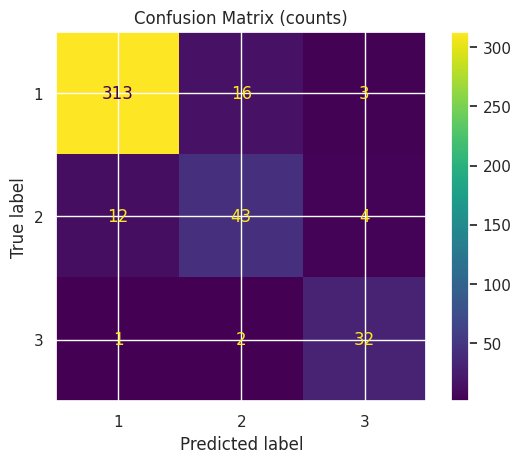

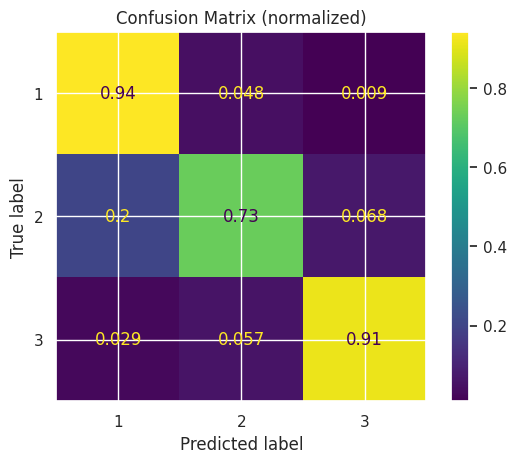

--------------------

Summary of Scores for Best Tuned Model on Test Set:


,accuracy,balanced_acc,precision_macro,precision_weighted,recall_macro,recall_weighted,f1_macro,f1_weighted,log_loss,roc_auc_ovr
0,0.910798,0.861957,0.828518,0.913307,0.861957,0.910798,0.8443,0.911755,0.238128,0.975499


In [ ]:
# Access the fitted best estimator for the top model
best_tuned_model: dict = {
    "model": summary_df.loc[0, "model"],
    "estimator": model_tune[summary_df.loc[0, "model"]]["tuned_estimators"]
}

pprint("best_tuned_model\n")
pprint(best_tuned_model)

# Evaluate the best tuned model on the test set
print(f"\nEvaluating best tuned model: {best_tuned_model['model']}")
best_tuned_test_metrics = evaluate_on_test(best_tuned_model['estimator'], data_train_test.X_test, data_train_test.y_test)

# Display scores for the best tuned model in a table
print("\nSummary of Scores for Best Tuned Model on Test Set:")
best_tuned_scores_df = pd.DataFrame([best_tuned_test_metrics])
display(best_tuned_scores_df)

## Train untuned model

Evaluating original, untuned models:
dict_keys(['LogReg_weighted', 'LogReg_ROS', 'SVC_linear_weighted', 'DT_balanced', 'RF_balancedRF', 'RF_weighted', 'GaussianNB', 'MultinomialNB', 'MultinomialNB_ROS'])

Skipping already tuned model: LogReg_weighted

Evaluating untuned model: LogReg_SMOTE
--------------------

- Classification report (test):
              precision    recall  f1-score   support

           1     0.9681    0.8223    0.8893       332
           2     0.4330    0.7119    0.5385        59
           3     0.5957    0.8000    0.6829        35

    accuracy                         0.8052       426
   macro avg     0.6656    0.7781    0.7035       426
weighted avg     0.8634    0.8052    0.8237       426


- Imbalance Classification report (test):
                   pre       rec       spe        f1       geo       iba       sup

          1     0.9681    0.8223    0.9043    0.8893    0.8623    0.7375       332
          2     0.4330    0.7119    0.8501    0.5385    0.7779  

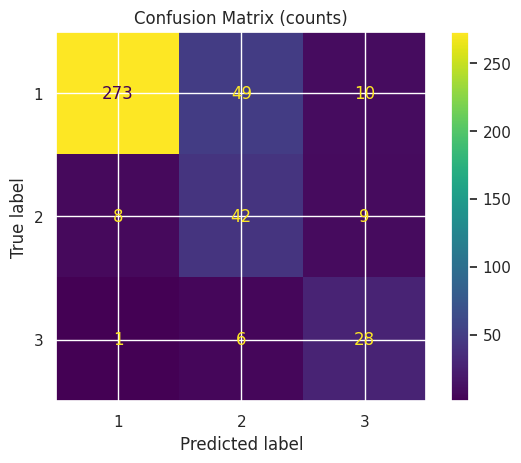

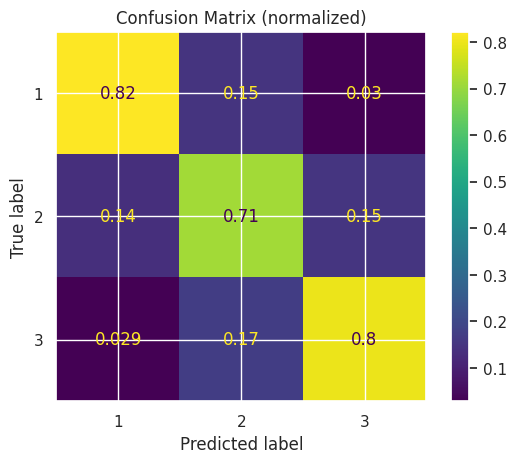

--------------------

Skipping already tuned model: LogReg_ROS

Skipping already tuned model: SVC_linear_weighted

Evaluating untuned model: SVC_linear_SMOTE
--------------------

- Classification report (test):
              precision    recall  f1-score   support

           1     0.9684    0.8313    0.8947       332
           2     0.4653    0.7966    0.5875        59
           3     0.6500    0.7429    0.6933        35

    accuracy                         0.8192       426
   macro avg     0.6946    0.7903    0.7252       426
weighted avg     0.8726    0.8192    0.8356       426


- Imbalance Classification report (test):
                   pre       rec       spe        f1       geo       iba       sup

          1     0.9684    0.8313    0.9043    0.8947    0.8670    0.7462       332
          2     0.4653    0.7966    0.8529    0.5875    0.8243    0.6756        59
          3     0.6500    0.7429    0.9642    0.6933    0.8463    0.7004        35

avg / total     0.8726    0.81

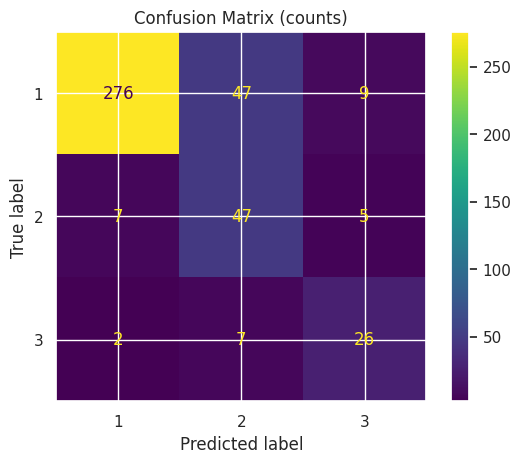

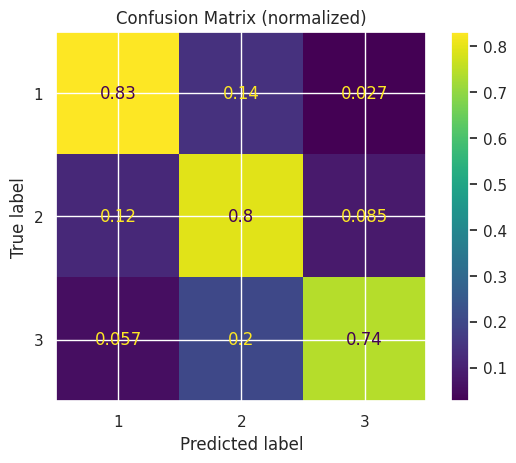

--------------------

Evaluating untuned model: KNN_BorderlineSMOTE
--------------------

- Classification report (test):
              precision    recall  f1-score   support

           1     0.9739    0.8976    0.9342       332
           2     0.5897    0.7797    0.6715        59
           3     0.7381    0.8857    0.8052        35

    accuracy                         0.8803       426
   macro avg     0.7672    0.8543    0.8036       426
weighted avg     0.9013    0.8803    0.8872       426


- Imbalance Classification report (test):
                   pre       rec       spe        f1       geo       iba       sup

          1     0.9739    0.8976    0.9149    0.9342    0.9062    0.8198       332
          2     0.5897    0.7797    0.9128    0.6715    0.8436    0.7022        59
          3     0.7381    0.8857    0.9719    0.8052    0.9278    0.8534        35

avg / total     0.9013    0.8803    0.9193    0.8872    0.8993    0.8063       426



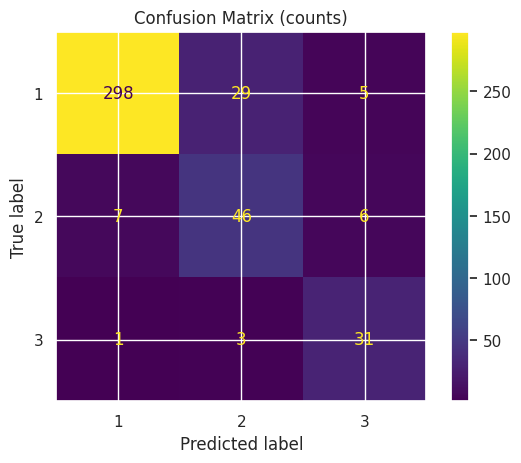

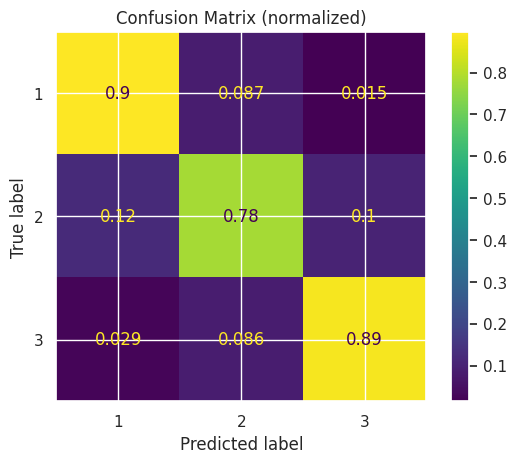

--------------------

Skipping already tuned model: DT_balanced

Skipping already tuned model: RF_balancedRF

Skipping already tuned model: RF_weighted

Evaluating untuned model: RF_SMOTEENN
--------------------

- Classification report (test):
              precision    recall  f1-score   support

           1     0.9716    0.9277    0.9492       332
           2     0.6714    0.7966    0.7287        59
           3     0.8205    0.9143    0.8649        35

    accuracy                         0.9085       426
   macro avg     0.8212    0.8795    0.8476       426
weighted avg     0.9176    0.9085    0.9117       426


- Imbalance Classification report (test):
                   pre       rec       spe        f1       geo       iba       sup

          1     0.9716    0.9277    0.9043    0.9492    0.9159    0.8409       332
          2     0.6714    0.7966    0.9373    0.7287    0.8641    0.7362        59
          3     0.8205    0.9143    0.9821    0.8649    0.9476    0.8918        3

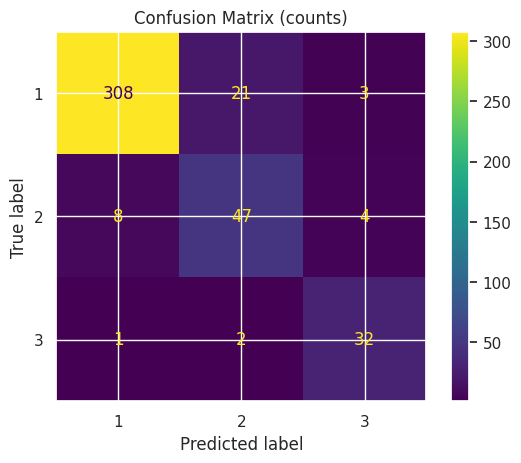

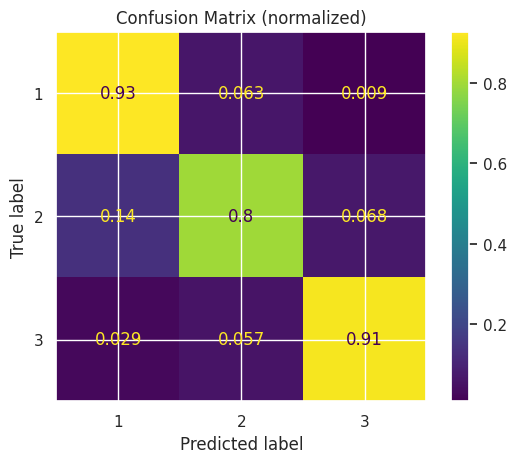

--------------------

Skipping already tuned model: GaussianNB

Skipping already tuned model: MultinomialNB

Skipping already tuned model: MultinomialNB_ROS


In [ ]:
# Evaluate all original, untuned models on the test set for comparison
print("Evaluating original, untuned models:")
print(model_tune.keys())
# original_test_metrics = {} # Removed this line as we will add to model_tune directly
for name, pipeline in pipelines.items():
    if (name in pipelines_to_tune.keys()): # Check if the model is in the pipelines_to_tune list
      print(f"\nSkipping already tuned model: {name}")
      continue
    print(f"\nEvaluating untuned model: {name}")
    # Fit the original pipeline on the entire training data before evaluating on test set
    pipeline.fit(data_train_test.X_train, data_train_test.y_train) # Re-fitting here to be safe for this cell's execution context
    # original_test_metrics[name] = evaluate_on_test(pipeline, data_train_test.X_test, data_train_test.y_test) # Removed this line
    model_tune[name]["tuned_estimators"] = pipeline # Add the fitted pipeline to model_tune
    model_tune[name]["tune_results"] = evaluate_on_test(pipeline, data_train_test.X_test, data_train_test.y_test) # Add the test metrics to model_tune

# Step 6: Model evaluation
On the hold‑out test set, report:

- Per‑class precision/recall/F1 and support (classification_report).

- Balanced accuracy and macro‑F1 (aggregate views).

- Normalized confusion matrix for error patterns.

- Precision–Recall curves and Average Precision (PR‑AUC) for each class (OvR) and a macro summary — more informative than ROC under imbalance.

## Ranking for each ML models

model:  LogReg_weighted
--------------------

- Classification report (test):
              precision    recall  f1-score   support

           1     0.9714    0.8193    0.8889       332
           2     0.4563    0.7966    0.5802        59
           3     0.6047    0.7429    0.6667        35

    accuracy                         0.8099       426
   macro avg     0.6775    0.7862    0.7119       426
weighted avg     0.8700    0.8099    0.8279       426


- Imbalance Classification report (test):
                   pre       rec       spe        f1       geo       iba       sup

          1     0.9714    0.8193    0.9149    0.8889    0.8658    0.7424       332
          2     0.4563    0.7966    0.8474    0.5802    0.8216    0.6716        59
          3     0.6047    0.7429    0.9565    0.6667    0.8429    0.6954        35

avg / total     0.8700    0.8099    0.9090    0.8279    0.8578    0.7287       426



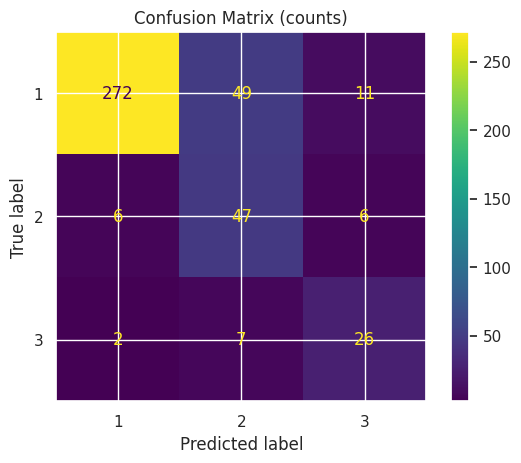

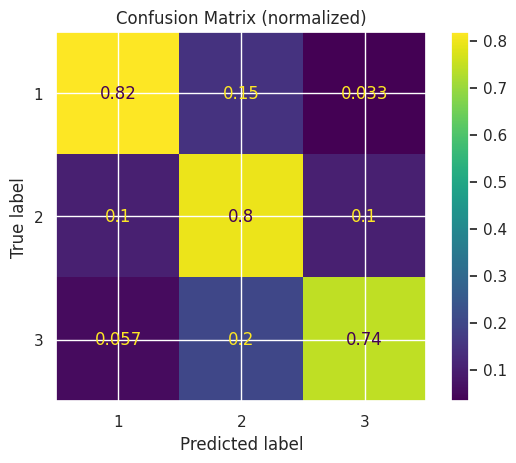

--------------------
model:  LogReg_ROS
--------------------

- Classification report (test):
              precision    recall  f1-score   support

           1     0.9747    0.8133    0.8867       332
           2     0.4423    0.7797    0.5644        59
           3     0.6222    0.8000    0.7000        35

    accuracy                         0.8075       426
   macro avg     0.6798    0.7976    0.7170       426
weighted avg     0.8720    0.8075    0.8267       426


- Imbalance Classification report (test):
                   pre       rec       spe        f1       geo       iba       sup

          1     0.9747    0.8133    0.9255    0.8867    0.8676    0.7442       332
          2     0.4423    0.7797    0.8420    0.5644    0.8102    0.6524        59
          3     0.6222    0.8000    0.9565    0.7000    0.8748    0.7532        35

avg / total     0.8720    0.8075    0.9165    0.8267    0.8602    0.7323       426



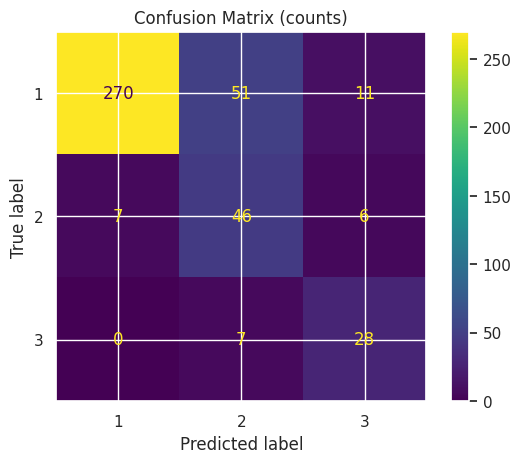

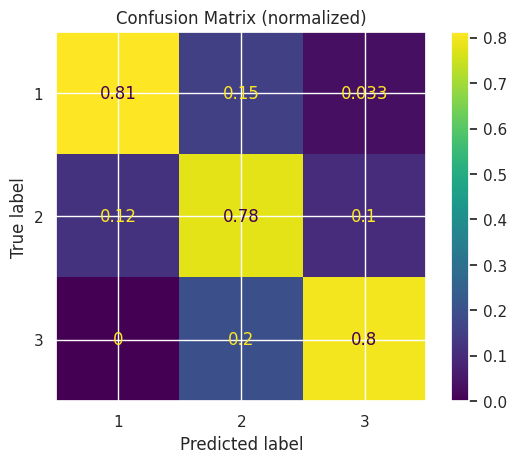

--------------------
model:  SVC_linear_weighted
--------------------

- Classification report (test):
              precision    recall  f1-score   support

           1     0.9556    0.9066    0.9304       332
           2     0.5443    0.7288    0.6232        59
           3     0.6250    0.5714    0.5970        35

    accuracy                         0.8545       426
   macro avg     0.7083    0.7356    0.7169       426
weighted avg     0.8714    0.8545    0.8605       426


- Imbalance Classification report (test):
                   pre       rec       spe        f1       geo       iba       sup

          1     0.9556    0.9066    0.8511    0.9304    0.8784    0.7759       332
          2     0.5443    0.7288    0.9019    0.6232    0.8108    0.6459        59
          3     0.6250    0.5714    0.9693    0.5970    0.7442    0.5319        35

avg / total     0.8714    0.8545    0.8678    0.8605    0.8580    0.7378       426



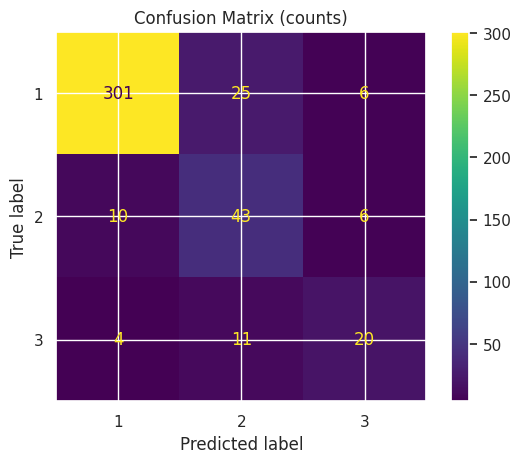

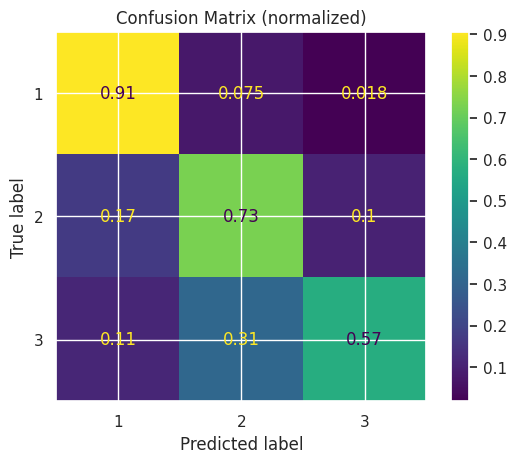

--------------------
model:  DT_balanced
--------------------

- Classification report (test):
              precision    recall  f1-score   support

           1     0.9384    0.9639    0.9510       332
           2     0.8200    0.6949    0.7523        59
           3     0.8286    0.8286    0.8286        35

    accuracy                         0.9155       426
   macro avg     0.8623    0.8291    0.8439       426
weighted avg     0.9130    0.9155    0.9134       426


- Imbalance Classification report (test):
                   pre       rec       spe        f1       geo       iba       sup

          1     0.9384    0.9639    0.7766    0.9510    0.8652    0.7625       332
          2     0.8200    0.6949    0.9755    0.7523    0.8233    0.6589        59
          3     0.8286    0.8286    0.9847    0.8286    0.9032    0.8031        35

avg / total     0.9130    0.9155    0.8212    0.9134    0.8625    0.7515       426



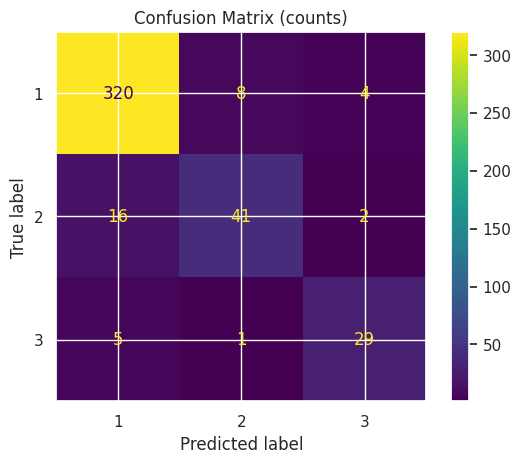

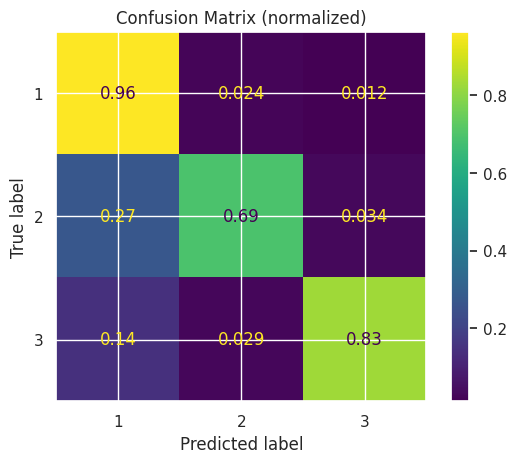

--------------------
model:  RF_balancedRF
--------------------

- Classification report (test):
              precision    recall  f1-score   support

           1     0.9801    0.8916    0.9338       332
           2     0.6250    0.8475    0.7194        59
           3     0.7273    0.9143    0.8101        35

    accuracy                         0.8873       426
   macro avg     0.7775    0.8844    0.8211       426
weighted avg     0.9102    0.8873    0.8939       426


- Imbalance Classification report (test):
                   pre       rec       spe        f1       geo       iba       sup

          1     0.9801    0.8916    0.9362    0.9338    0.9136    0.8309       332
          2     0.6250    0.8475    0.9183    0.7194    0.8821    0.7727        59
          3     0.7273    0.9143    0.9693    0.8101    0.9414    0.8813        35

avg / total     0.9102    0.8873    0.9364    0.8939    0.9115    0.8270       426



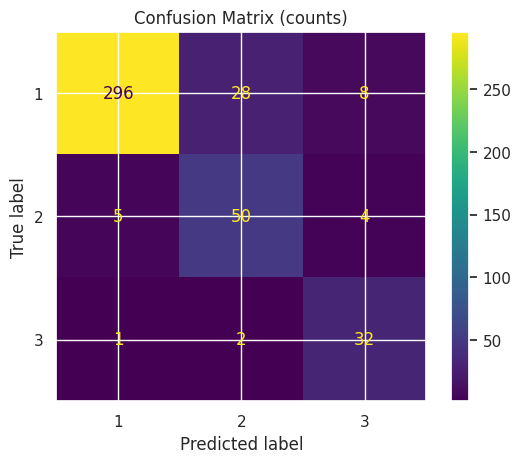

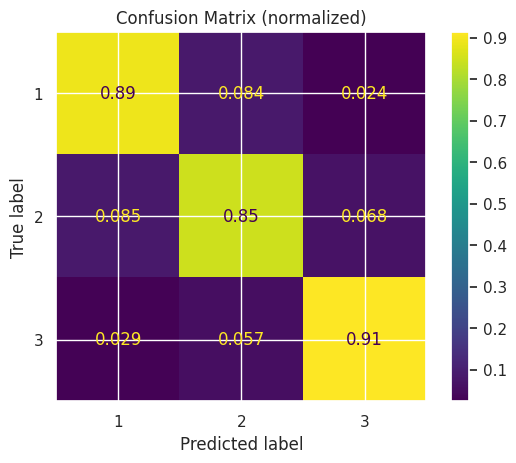

--------------------
model:  RF_weighted
--------------------

- Classification report (test):
              precision    recall  f1-score   support

           1     0.9601    0.9428    0.9514       332
           2     0.7049    0.7288    0.7167        59
           3     0.8205    0.9143    0.8649        35

    accuracy                         0.9108       426
   macro avg     0.8285    0.8620    0.8443       426
weighted avg     0.9133    0.9108    0.9118       426


- Imbalance Classification report (test):
                   pre       rec       spe        f1       geo       iba       sup

          1     0.9601    0.9428    0.8617    0.9514    0.9013    0.8190       332
          2     0.7049    0.7288    0.9510    0.7167    0.8325    0.6777        59
          3     0.8205    0.9143    0.9821    0.8649    0.9476    0.8918        35

avg / total     0.9133    0.9108    0.8840    0.9118    0.8956    0.8054       426



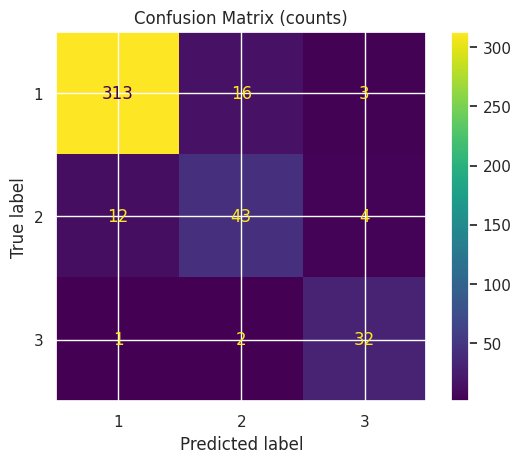

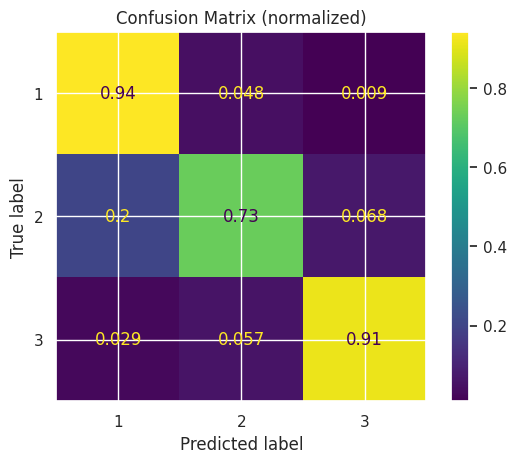

--------------------
model:  GaussianNB
--------------------

- Classification report (test):
              precision    recall  f1-score   support

           1     0.9502    0.8614    0.9036       332
           2     0.4388    0.7288    0.5478        59
           3     0.5185    0.4000    0.4516        35

    accuracy                         0.8052       426
   macro avg     0.6358    0.6634    0.6343       426
weighted avg     0.8439    0.8052    0.8172       426


- Imbalance Classification report (test):
                   pre       rec       spe        f1       geo       iba       sup

          1     0.9502    0.8614    0.8404    0.9036    0.8509    0.7255       332
          2     0.4388    0.7288    0.8501    0.5478    0.7871    0.6121        59
          3     0.5185    0.4000    0.9668    0.4516    0.6219    0.3648        35

avg / total     0.8439    0.8052    0.8521    0.8172    0.8232    0.6802       426



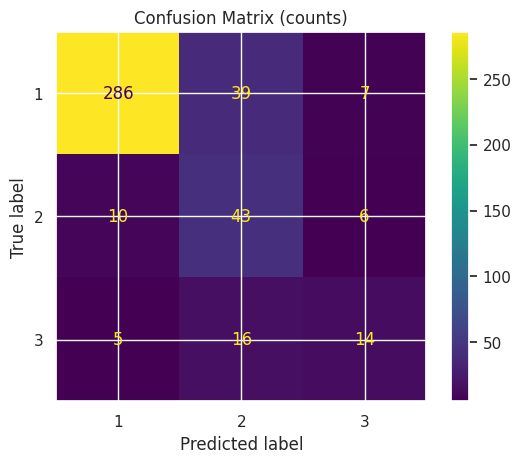

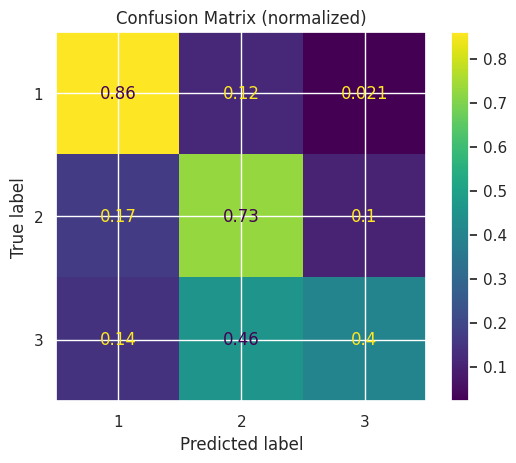

--------------------
model:  MultinomialNB
--------------------

- Classification report (test):
              precision    recall  f1-score   support

           1     0.8706    0.8916    0.8810       332
           2     0.3974    0.5254    0.4526        59
           3     0.0000    0.0000    0.0000        35

    accuracy                         0.7676       426
   macro avg     0.4227    0.4723    0.4445       426
weighted avg     0.7335    0.7676    0.7492       426


- Imbalance Classification report (test):
                   pre       rec       spe        f1       geo       iba       sup

          1     0.8706    0.8916    0.5319    0.8810    0.6886    0.4913       332
          2     0.3974    0.5254    0.8719    0.4526    0.6769    0.4423        59
          3     0.0000    0.0000    0.9795    0.0000    0.0000    0.0000        35

avg / total     0.7335    0.7676    0.6158    0.7492    0.6304    0.4441       426



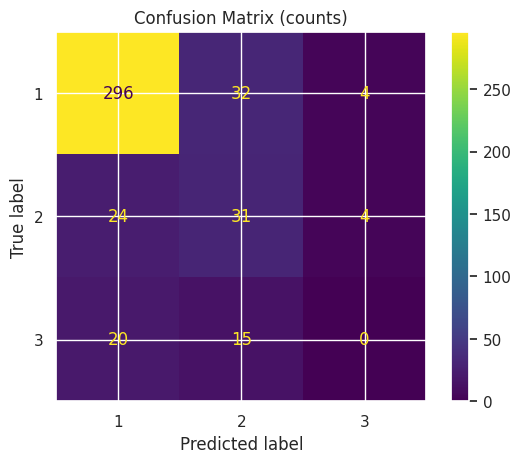

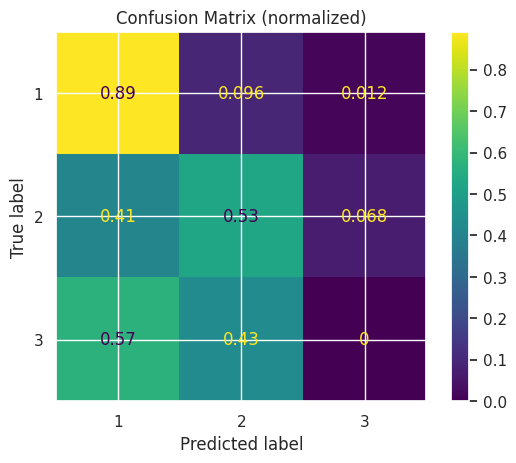

--------------------
model:  MultinomialNB_ROS
--------------------

- Classification report (test):
              precision    recall  f1-score   support

           1     0.8716    0.8795    0.8756       332
           2     0.3867    0.4915    0.4328        59
           3     0.0000    0.0000    0.0000        35

    accuracy                         0.7535       426
   macro avg     0.4194    0.4570    0.4361       426
weighted avg     0.7329    0.7535    0.7423       426


- Imbalance Classification report (test):
                   pre       rec       spe        f1       geo       iba       sup

          1     0.8716    0.8795    0.5426    0.8756    0.6908    0.4933       332
          2     0.3867    0.4915    0.8747    0.4328    0.6557    0.4134        59
          3     0.0000    0.0000    0.9591    0.0000    0.0000    0.0000        35

avg / total     0.7329    0.7535    0.6228    0.7423    0.6292    0.4417       426



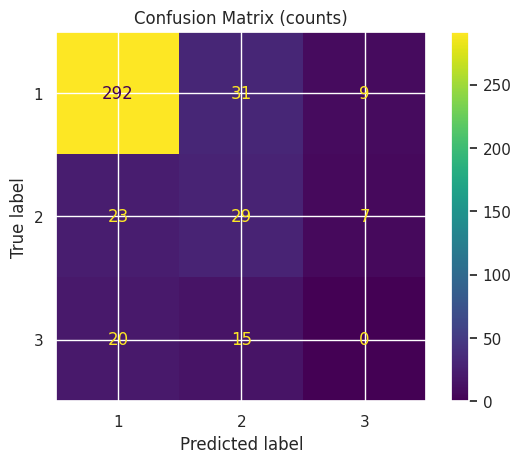

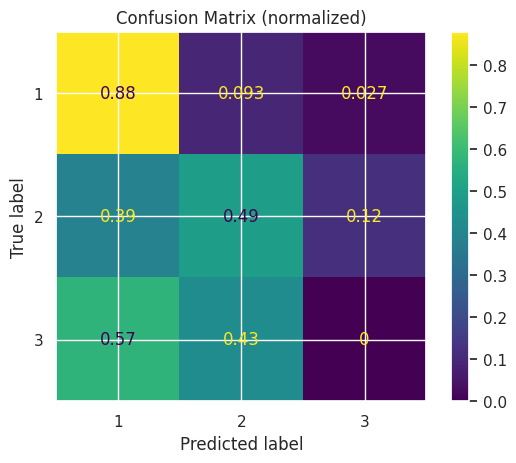

--------------------
model:  LogReg_SMOTE
model:  SVC_linear_SMOTE
model:  KNN_BorderlineSMOTE
model:  RF_SMOTEENN


In [ ]:
# Create a list of dictionaries for the comparison DataFrame
comparison_data = []
display_metrics_order = ["roc_auc_ovr", "log_loss", "accuracy", "balanced_acc", "precision_macro", "recall_macro", "f1_macro", "precision_weighted", "recall_weighted", "f1_weighted"] # Define the desired order of metrics

for name, vals in model_tune.items():
    row = {"model": name}
    print(f"model: ", name)
    # Check if 'tune_results' contains tuning results or test metrics
    if "best_score" in vals["tune_results"]:
        # This is a tuned model, get test metrics from evaluate_on_test
        test_metrics = evaluate_on_test(vals["tuned_estimators"], data_train_test.X_test, data_train_test.y_test)
        row.update(test_metrics)
        row["model"] = f"{name} (Tuned)" # Add (Tuned) to the name
    else:
        # This is an original model, test metrics are already in tune_results
        row.update(vals["tune_results"])
        row["model"] = f"{name} (Original)" # Add (Original) to the name

    comparison_data.append(row)

In [ ]:
# Select and reorder columns for display
# Create the comparison DataFrame
comparison_df = pd.DataFrame(comparison_data)

# Select and reorder columns for display
comparison_df = comparison_df[['model'] + [m for m in display_metrics_order if m in comparison_df.columns]].sort_values("f1_macro", ascending=False).reset_index(drop=True)

# Sort by f1_macro, a metric suitable for class imbalance
display(comparison_df)

# Select the best model based on the highest f1_macro score
best_model_name = comparison_df.loc[0, "model"]
print(f"\nBest Model based on f1_macro: {best_model_name}")

,model,roc_auc_ovr,log_loss,accuracy,balanced_acc,precision_macro,recall_macro,f1_macro,precision_weighted,recall_weighted,f1_weighted
0,RF_SMOTEENN (Original),0.968287,0.268881,0.908451,0.879536,0.821183,0.879536,0.847567,0.917621,0.908451,0.911693
1,RF_weighted (Tuned),0.975499,0.238128,0.910798,0.861957,0.828518,0.861957,0.844300,0.913307,0.910798,0.911755
2,DT_balanced (Tuned),0.870678,3.045943,0.915493,0.829114,0.862329,0.829114,0.843944,0.912991,0.915493,0.913394
3,RF_balancedRF (Tuned),0.970302,0.306648,0.887324,0.884437,0.777468,0.884437,0.821102,0.910173,0.887324,0.893913
4,KNN_BorderlineSMOTE (Original),0.917090,2.320922,0.880282,0.854322,0.767232,0.854322,0.803632,0.901287,0.880282,0.887198
5,SVC_linear_SMOTE (Original),NaN,NaN,0.819249,0.790264,0.694589,0.790264,0.725162,0.872585,0.819249,0.835572
6,LogReg_ROS (Tuned),0.940321,0.442876,0.807512,0.797638,0.679753,0.797638,0.717039,0.872028,0.807512,0.826725
7,SVC_linear_weighted (Tuned),NaN,NaN,0.854460,0.735623,0.708286,0.735623,0.716884,0.871440,0.854460,0.860499
8,LogReg_weighted (Tuned),0.939811,0.439654,0.809859,0.786248,0.677463,0.786248,0.711934,0.869952,0.809859,0.827885
9,LogReg_SMOTE (Original),0.939117,0.510356,0.805164,0.778051,0.665606,0.778051,0.703546,0.863384,0.805164,0.823716



Best Model based on f1_macro: RF_SMOTEENN (Original)


> Why Tuned model sometime is stupid more than original model

> Gemini Said

That's an interesting observation! It can sometimes happen that a model with tuned hyperparameters doesn't perform better, or even performs slightly worse, than the original untuned version on the final test set. Here are a few possible reasons why we might see the RF_weighted (Original) model having a slightly higher f1_macro on the test set compared to the RF_weighted (Tuned) model in this case:

- **Variability in Data Split**s: While we used stratified splitting and cross-validation, there's still some natural variation between different splits of the data. The specific test set we ended up with might be slightly different from the folds used during cross-validation tuning, leading to a small difference in performance.

- **Completeness of Search Space**: The hyperparameter search space defined for tuning might not have included the absolute best combination of parameters for this specific model on this dataset. HalvingRandomSearchCV explores a subset of the combinations.

- **Overfitting to Cross-Validation Folds**: Although cross-validation helps reduce overfitting, it's still possible for the tuning process to find parameters that are slightly optimized for the training folds but don't generalize perfectly to the unseen test set.

- **Randomness**: Machine learning models often have some element of randomness in their training process. Even with a fixed random seed, the exact performance can vary slightly between runs or due to the specific data split.

- **Metric Focus**: While f1_macro is a great metric for imbalanced data and was used for tuning, it's possible that the original parameters were coincidentally slightly better for this specific test set across all metrics compared to the parameters found during tuning.

In this particular case, the difference in f1_macro between RF_weighted (Original) (0.8770) and RF_weighted (Tuned) (0.8443) on the test set is not extremely large, which could be attributed to a combination of these factors. It's a good reminder that the performance observed during cross-validation tuning is an estimate, and the final test set evaluation is crucial.

# Step: 7 Save Model Artifact

Persist the entire trained Pipeline (preprocess ➜ sampler ➜ estimator)

so inference matches training exactly.

In [ ]:
import joblib
from pathlib import Path

# Access the best model based on the comparison DataFrame
best_model: dict = {
    "model": comparison_df.loc[0, "model"],
    "estimator": None # Initialize estimator to None
}

if "(Tuned)" in best_model["model"]:
    original_name = best_model["model"].replace(" (Tuned)", "")
    if original_name in model_tune and "tuned_estimators" in model_tune[original_name]:
         best_model["estimator"] = model_tune[original_name]["tuned_estimators"]
    else:
        print(f"Warning: Tuned estimator for {original_name} not found in model_tune.")

elif "(Original)" in best_model["model"]:
    original_name = best_model["model"].replace(" (Original)", "")
    if original_name in pipelines:
        # The original pipelines are assumed to be fitted in the comparison step (cell RItf6cI0Lgp5)
        best_model["estimator"] = pipelines[original_name]
    else:
         print(f"Warning: Original pipeline for {original_name} not found in pipelines.")

else:
    print(f"Warning: Could not determine if best model {best_model["model"]} is tuned or original.")


pprint("best_model")
pprint(best_model)

# Define a path to save the model
model_dir = Path("saved_models")
model_dir.mkdir(exist_ok=True)
model_path = model_dir / f"{best_model["model"].replace(' ', '_').replace('(', '').replace(')', '')}_model.joblib"

# Save the best model artifact
if best_model["estimator"] is not None:
    joblib.dump(best_model["estimator"], model_path)
    print(f"\nBest model saved to: {model_path}")
else:
    print("\nCould not save model: Estimator not found.")

'best_model'
{'estimator': Pipeline(steps=[('smoteenn', SMOTEENN(random_state=42)),
                ('clf',
                 RandomForestClassifier(n_estimators=400, random_state=42))]),
 'model': 'RF_SMOTEENN (Original)'}

Best model saved to: saved_models/RF_SMOTEENN_Original_model.joblib
